In [2]:
# lista de import de librerias que seran utilizadas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np
from datetime import datetime
sns.set(style="white")

### En el analisis individual de cada moneda se tomaran en cuenta las 10 monedas volatiles con mayor capitalizacion, ya que son las que varian de precio en el tiempo y por lo tanto se puede saca una ganancia de ellas en contraparte de las monedas estables que tambien tiene variacion pero son imperseptibles para el mercado y su principal uso es para congelar las ganancias.

In [94]:
# Utiliza la funcion read_csv de pandas, para leer el archivo csv y tranformarlo en un dataframe
df_BTC = pd.read_csv("./Data/Bitcoin.csv",delimiter=',')
df_BTC.head()

,Price_usd,Market_cap,Volume,Date
0,4297,71329258156,720251082,2017-09-30 00:00:00
1,6368,106082152741,1800486324,2017-10-31 00:00:00
2,10406,173903131019,7443964832,2017-11-30 00:00:00
3,14839,248925602660,2921202870,2017-12-31 00:00:00
4,9989,168188285150,3804947187,2018-01-31 00:00:00


In [98]:
# Informacion basica de las columnas del dataframe
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Price_usd   72 non-null     int64         
 1   Market_cap  72 non-null     int64         
 2   Volume      72 non-null     int64         
 3   Date        72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.4 KB


In [96]:
# COnvierte la columna Data de tipo de dato texto a tipo de dato datetime
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])
df_BTC['Date'] = df_BTC['Date'].dt.strftime('%Y-%m-%d')
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])

In [133]:
df_BTC.head()

,Price_usd,Market_cap,Volume,Date,Year
0,4297,71329258156,720251082,2017-09-30,2017
1,6368,106082152741,1800486324,2017-10-31,2017
2,10406,173903131019,7443964832,2017-11-30,2017
3,14839,248925602660,2921202870,2017-12-31,2017
4,9989,168188285150,3804947187,2018-01-31,2018


In [87]:
df_BTC.describe()

,Price_usd,Market_cap,Volume
count,72.000000,7.200000e+01,7.200000e+01
mean,20368.625000,3.807349e+11,2.244135e+10
std,15777.095133,3.013645e+11,1.569520e+10
min,3457.000000,6.055537e+10,7.202511e+08
25%,8154.750000,1.438248e+11,7.837457e+09
50%,12754.500000,2.325526e+11,2.229303e+10
75%,29574.250000,5.747739e+11,3.193918e+10
max,61837.000000,1.166424e+12,6.210207e+10


In [90]:
# Crea un grafico de cajas ingresando como parametro una columna.
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.xlabel('Precios')
    plt.show()

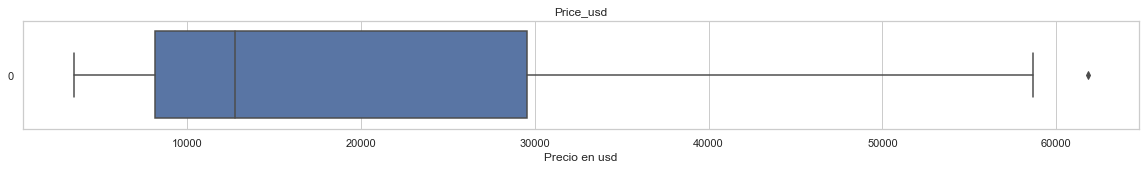

In [126]:
boxplot(df_BTC['Price_usd'])

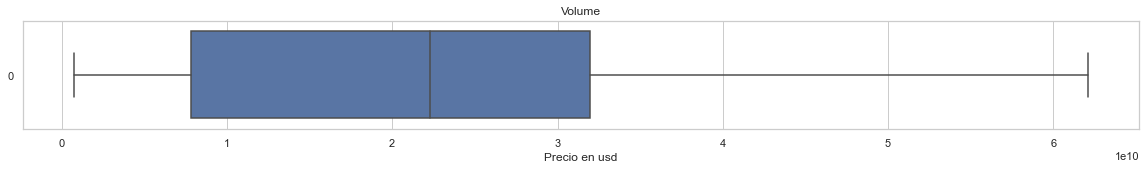

In [127]:
boxplot(df_BTC['Volume'])

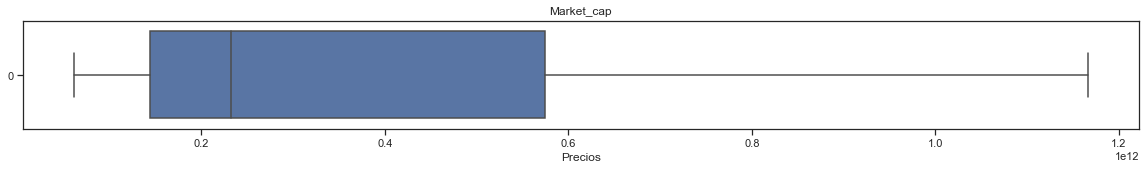

In [93]:
boxplot(df_BTC['Market_cap'])

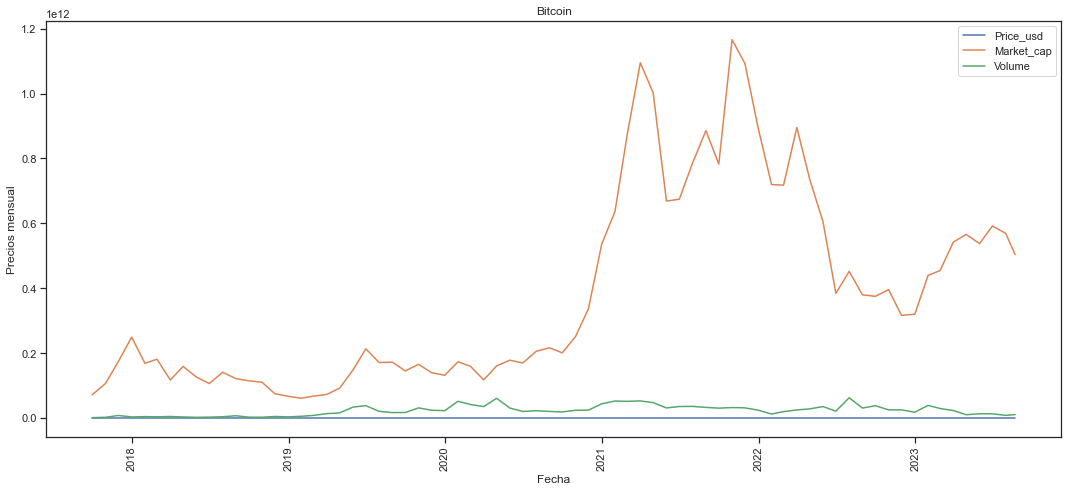

In [99]:
# Crea un grafico de lineas con la libreria seaborn de las columnas seleccionadas en el bucle for.
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
for column in df_BTC.columns[:3]:
    sns.lineplot(data=df_BTC, x='Date', y=column, label=column)
plt.title('Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precios mensual')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Guille\AppData\Local\Temp\ipykernel_14356\1932256394.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_BTC.corr(), annot=True, cmap="coolwarm", center=0)


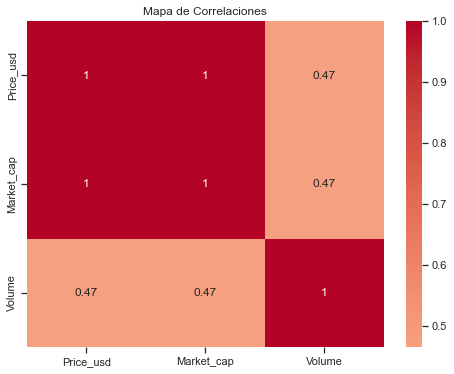

In [100]:
# Crea un grafico de correlaciones 
plt.figure(figsize=(8, 6))
sns.heatmap(df_BTC.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Correlaciones")
plt.show()

In [96]:
# Crea un grafico 
def _hist(column):
    sns.set(style="white")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_BTC, x=column)
    plt.title("Histograma de Columna BTC")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

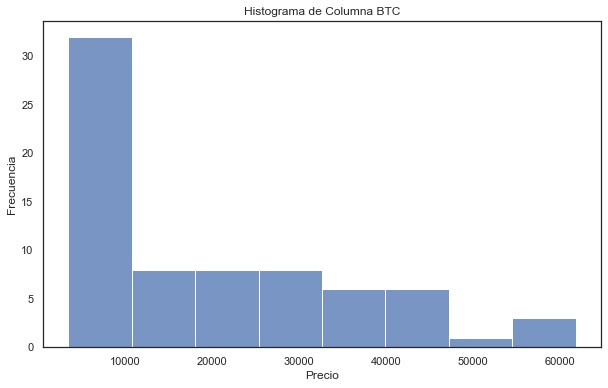

In [97]:
_hist('Price_usd')

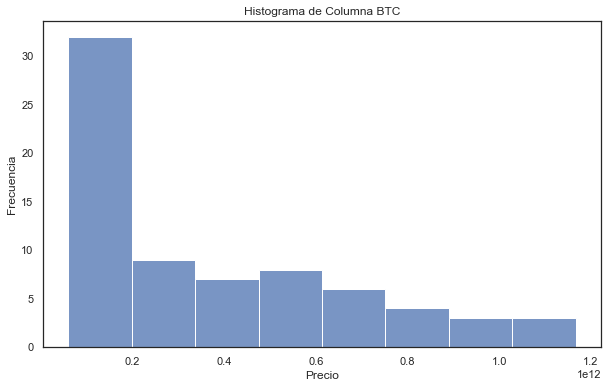

In [98]:
_hist('Market_cap')

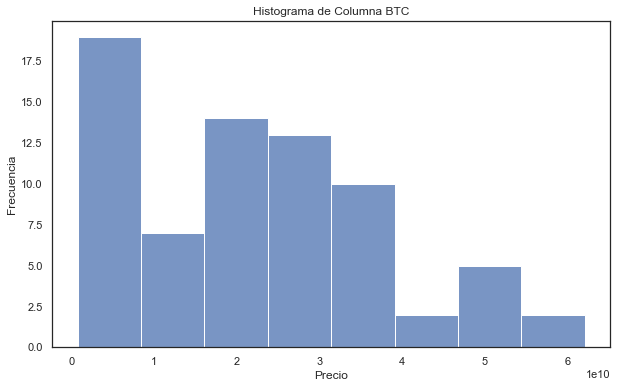

In [99]:
_hist('Volume')

In [100]:
def _sactter(ycolumn,xcolumn):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_BTC[xcolumn], df_BTC[ycolumn])
    plt.title("Gráfico de Dispersión BTC")
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.show()

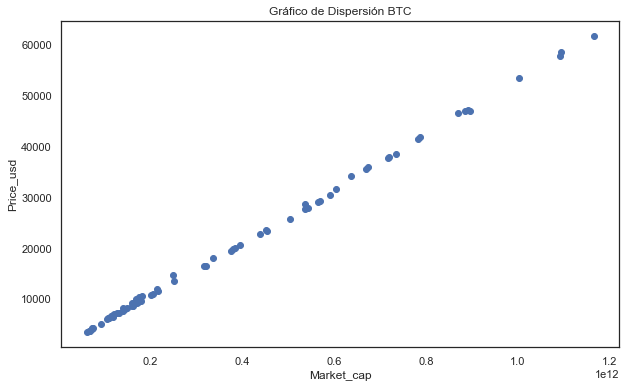

In [101]:
_sactter('Price_usd','Market_cap')

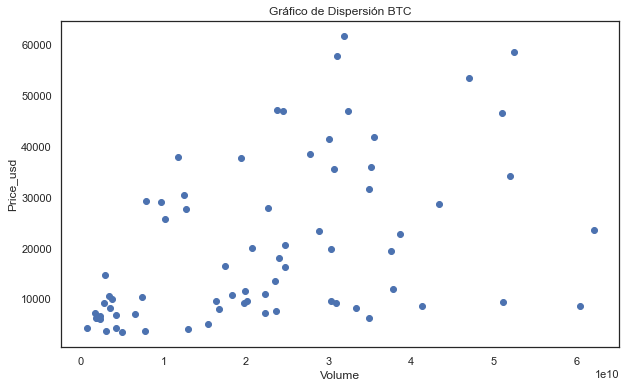

In [102]:
_sactter('Price_usd','Volume')

<AxesSubplot: xlabel='Price_usd', ylabel='Volume'>

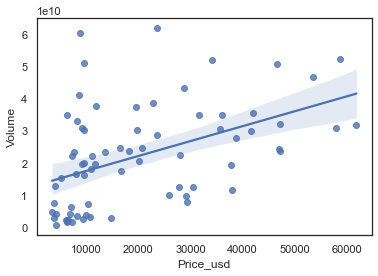

In [103]:
sns.regplot(x='Price_usd', y= 'Volume', data=df_BTC)

KPI: Porcentaje de crecimiento de Market_cap por año

In [143]:
# Calcular la media de Market_cap por año y calcula en porcentaje si termino con un precio mayor o menor al promedio al termina el año
df_BTC['Year'] = df_BTC['Date'].dt.year
average_market_cap_by_year = df_BTC.groupby('Year')['Market_cap'].mean()
last_months = df_BTC.groupby('Year')['Date'].transform('max')
last_month_data = df_BTC[df_BTC['Date'] == last_months]
merged_data = pd.merge(last_month_data, average_market_cap_by_year, left_on='Year', right_index=True, suffixes=('_last_month', '_avg_year'))
merged_data['Percentage Change'] = ((merged_data['Market_cap_last_month'] - merged_data['Market_cap_avg_year']) / merged_data['Market_cap_avg_year']) * 100
df_BTC['Percentage Change'] = merged_data['Percentage Change']


KPI: Promedios moviles

In [149]:
# calcula el proledio movil en un lapso de 3 periodos
period = 3
df_BTC["Moving_Average"] = df_BTC["Price_usd"].rolling(window=period).mean()

KPI: Patrones de Volumen de Operaciones

In [139]:
# Detectar picos de volumen (aumentos significativos en el volumen) a traves de un umbral (threshold) para definir qué se considera un pico.
threshold = 2.5  
df_BTC["Volume_Peak"] = (df_BTC["Volume"] > df_BTC["Volume"].shift(1) * threshold) & (df_BTC["Volume"] > df_BTC["Volume"].shift(-1) * threshold)

KPI: tasa de crecimiento de la capitalización de mercado

In [145]:
df_BTC["Growth_Rate"] = (df_BTC["Market_cap"].shift(-1) - df_BTC["Market_cap"]) / df_BTC["Market_cap"] * 100

In [148]:
df_BTC.head(10)

,Price_usd,Market_cap,Volume,Date,Year,Moving_Average,Volume_Peak,Percentage Change,Growth_Rate
0,4297,71329258156,720251082,2017-09-30,2017,NaN,False,NaN,48.721795
1,6368,106082152741,1800486324,2017-10-31,2017,NaN,False,NaN,63.932506
2,10406,173903131019,7443964832,2017-11-30,2017,7023.666667,True,NaN,43.140380
3,14839,248925602660,2921202870,2017-12-31,2017,10537.666667,False,65.884008,-32.434316
4,9989,168188285150,3804947187,2018-01-31,2018,11744.666667,False,NaN,7.548578
5,10709,180884108725,3398119467,2018-02-28,2018,11845.666667,False,NaN,-35.372513
6,6897,116900853303,4264255594,2018-03-31,2018,9198.333333,False,NaN,35.664373
7,9325,158592809944,2827554754,2018-04-30,2018,8977.000000,False,NaN,-20.580345
8,7380,125953862789,1772428207,2018-05-31,2018,7867.333333,False,NaN,-15.955423
9,6182,105857391286,2341618860,2018-06-30,2018,7629.000000,False,NaN,32.858717


***

# Analisis Global de criptomonedas

In [33]:
df_global = pd.read_csv('./Data/all_coins.csv',delimiter=',')
df_global.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,circulating_supply,max_price,min_price,last_updated
0,bitcoin,btc,Bitcoin,25965.000000,505334532485,1,5.451093e+11,1.192175e+10,1.946770e+07,69045.00,67.810000,2023-08-25T20:08:16.581Z
1,ethereum,eth,Ethereum,1645.390000,197834905602,2,1.978349e+11,7.262542e+09,1.202164e+08,4878.26,0.432979,2023-08-25T20:08:18.543Z
2,tether,usdt,Tether,0.999503,82779760569,3,8.277976e+10,1.122434e+10,8.284913e+10,1.32,0.572521,2023-08-25T20:05:00.524Z
3,binancecoin,bnb,BNB,217.310000,33421449941,4,4.344506e+10,3.896782e+08,1.538562e+08,686.31,0.039818,2023-08-25T20:08:12.635Z
4,ripple,xrp,XRP,0.524097,27780175668,5,5.250042e+10,9.233069e+08,5.291419e+10,3.40,0.002686,2023-08-25T20:08:18.814Z


In [34]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       250 non-null    object 
 1   symbol                   250 non-null    object 
 2   name                     250 non-null    object 
 3   current_price            250 non-null    float64
 4   market_cap               250 non-null    int64  
 5   market_cap_rank          250 non-null    int64  
 6   fully_diluted_valuation  239 non-null    float64
 7   total_volume             250 non-null    float64
 8   circulating_supply       250 non-null    float64
 9   max_price                250 non-null    float64
 10  min_price                250 non-null    float64
 11  last_updated             250 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 23.6+ KB


In [35]:
df_global[['id','symbol','name','market_cap_rank']] = df_global[['id','symbol','name','market_cap_rank']].astype('category')

In [36]:
df_global['last_updated'] = df_global['last_updated'].apply(lambda x: datetime.strptime(x.split('T')[0], "%Y-%m-%d"))

In [61]:
valores_a_eliminar = ['tether', 'usd-coin']
df_top10_coins = df_global.loc[~df_global['id'].isin(valores_a_eliminar)]
df_top10_coins.reset_index(drop=True, inplace=True)
df_top10_coins = df_top10_coins.iloc[:10]


In [64]:
df_top10_coins

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,circulating_supply,max_price,min_price,last_updated
0,bitcoin,btc,Bitcoin,25965.000000,505334532485,1,5.451093e+11,1.192175e+10,1.946770e+07,69045.000000,67.810000,2023-08-25
1,ethereum,eth,Ethereum,1645.390000,197834905602,2,1.978349e+11,7.262542e+09,1.202164e+08,4878.260000,0.432979,2023-08-25
2,binancecoin,bnb,BNB,217.310000,33421449941,4,4.344506e+10,3.896782e+08,1.538562e+08,686.310000,0.039818,2023-08-25
3,ripple,xrp,XRP,0.524097,27780175668,5,5.250042e+10,9.233069e+08,5.291419e+10,3.400000,0.002686,2023-08-25
4,staked-ether,steth,Lido Staked Ether,1646.120000,13782413016,7,1.378241e+10,1.715560e+07,8.377825e+06,4829.570000,482.900000,2023-08-25
5,cardano,ada,Cardano,0.259446,9101540359,8,1.168695e+10,2.213937e+08,3.504502e+10,3.090000,0.019253,2023-08-25
6,dogecoin,doge,Dogecoin,0.062615,8812540640,9,8.812528e+09,2.346437e+08,1.407384e+11,0.731578,0.000087,2023-08-25
7,solana,sol,Solana,20.200000,8246327031,10,1.123691e+10,2.825942e+08,4.078934e+08,259.960000,0.500801,2023-08-25
8,tron,trx,TRON,0.076794,6864536207,11,6.864542e+09,1.980746e+08,8.937661e+10,0.231673,0.001804,2023-08-25
9,polkadot,dot,Polkadot,4.460000,5656729623,12,6.017867e+09,9.812536e+07,1.267944e+09,54.980000,2.700000,2023-08-25


In [65]:
df_top10_coins.describe()

,current_price,market_cap,fully_diluted_valuation,total_volume,circulating_supply,max_price,min_price
count,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000
mean,2949.940295,8.168352e+10,8.972909e+10,2.154926e+09,3.200520e+10,7976.153325,55.440743
std,8114.626155,1.599187e+11,1.703028e+11,4.078030e+09,4.896940e+10,21547.584599,151.680064
min,0.062615,5.656730e+09,6.017867e+09,1.715560e+07,8.377825e+06,0.231673,0.000087
25%,0.325609,8.387880e+09,9.418624e+09,2.039044e+08,1.286264e+08,3.167500,0.006828
50%,12.330000,1.144198e+10,1.273468e+10,2.586190e+08,8.379187e+08,157.470000,0.236398
75%,1288.370000,3.201113e+10,5.023658e+10,7.898997e+08,4.844690e+10,3793.755000,2.150200
max,25965.000000,5.053345e+11,5.451093e+11,1.192175e+10,1.407384e+11,69045.000000,482.900000


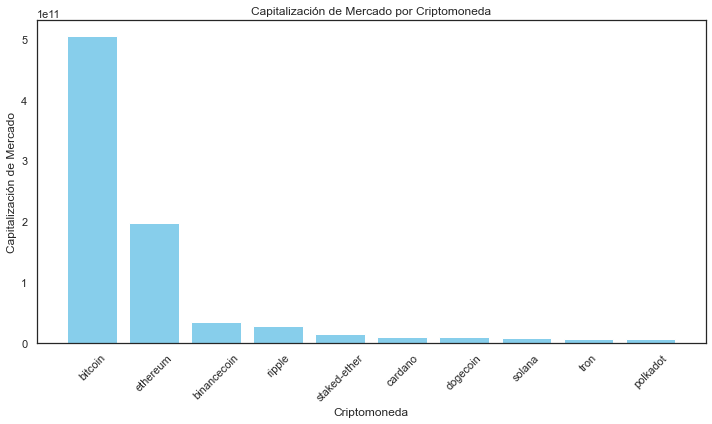

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(df_top10_coins['id'], df_top10_coins['market_cap'], color='skyblue')
plt.xlabel('Criptomoneda')
plt.ylabel('Capitalización de Mercado')
plt.title('Capitalización de Mercado por Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis univariable

<AxesSubplot: xlabel='current_price', ylabel='Count'>

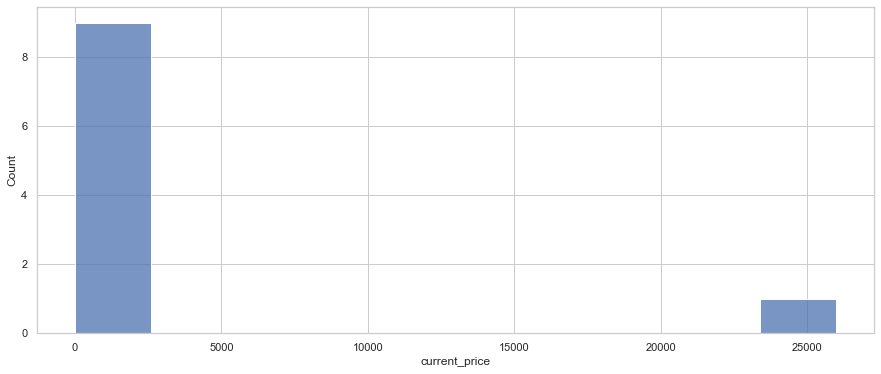

In [324]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='current_price',bins=10)

<AxesSubplot: xlabel='market_cap', ylabel='Count'>

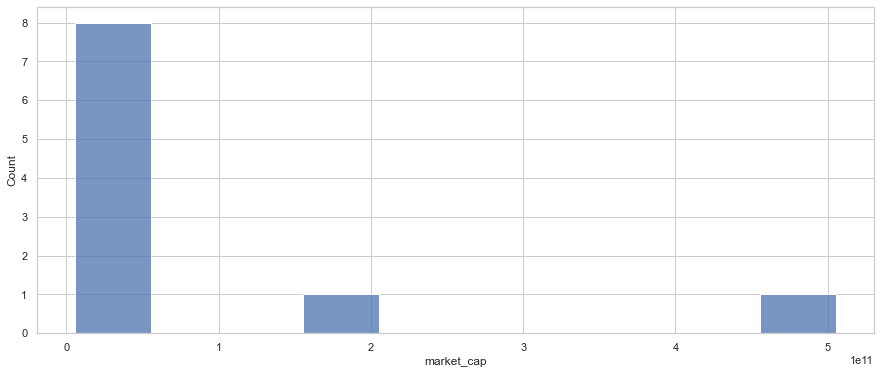

In [325]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='market_cap',bins=10)

<AxesSubplot: xlabel='fully_diluted_valuation', ylabel='Count'>

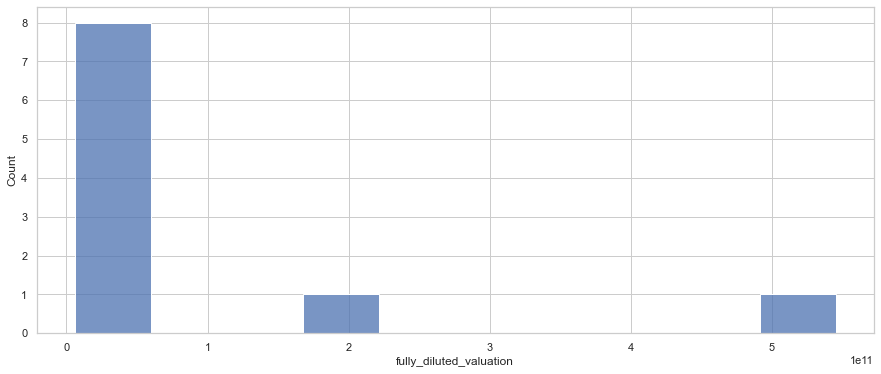

In [326]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='fully_diluted_valuation',bins=10)

<AxesSubplot: xlabel='total_volume', ylabel='Count'>

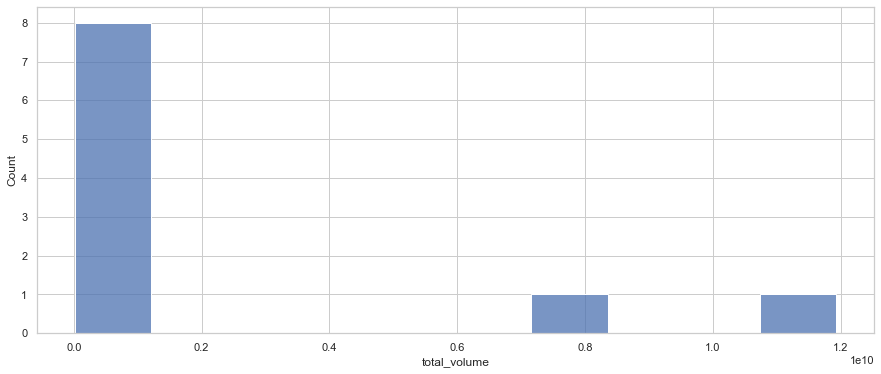

In [327]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='total_volume',bins=10)

<AxesSubplot: xlabel='circulating_supply', ylabel='Count'>

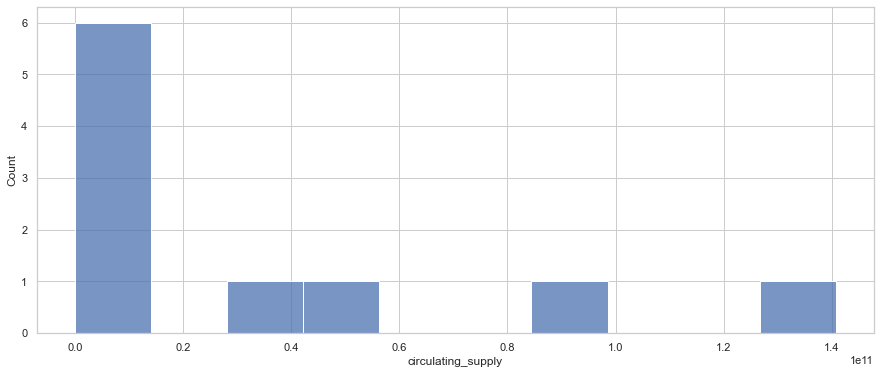

In [328]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='circulating_supply',bins=10)

<AxesSubplot: xlabel='max_price', ylabel='Count'>

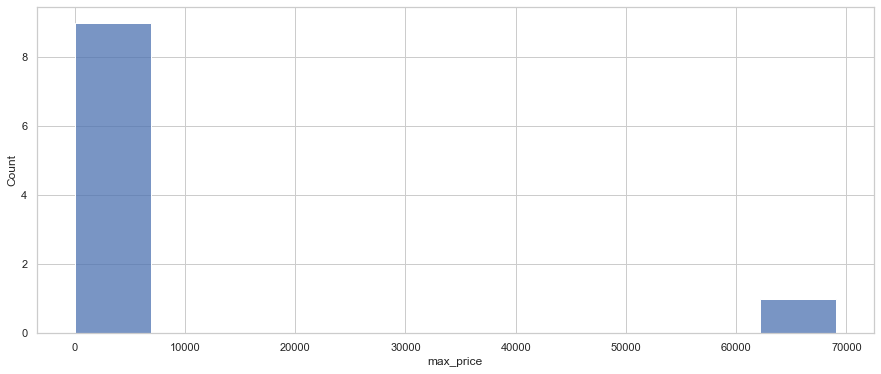

In [329]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='max_price',bins=10)

<AxesSubplot: xlabel='min_price', ylabel='Count'>

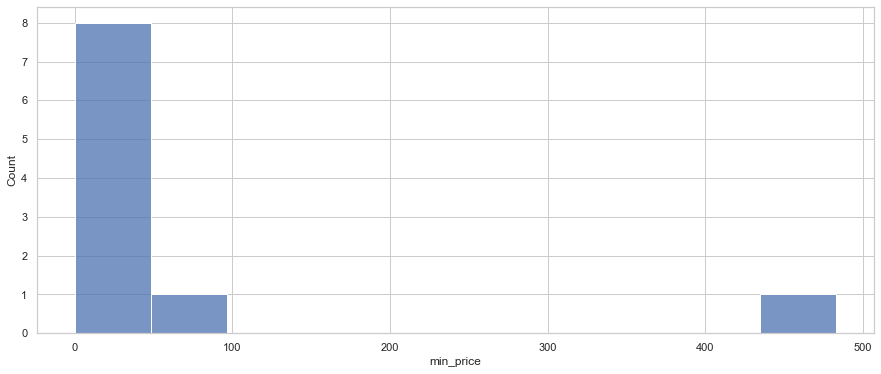

In [330]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_top10_coins,x='min_price',bins=10)

In [68]:
# Crea un grafico de cajas ingresando como parametro una columna.
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.show()

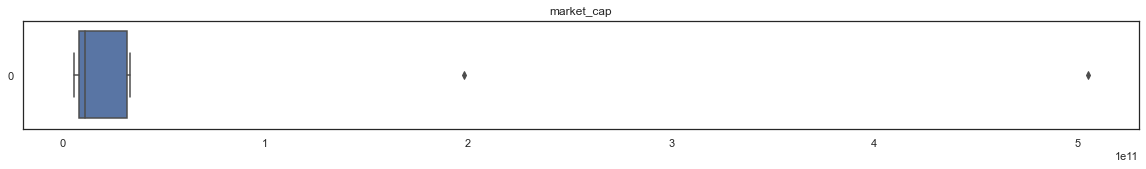

In [69]:
boxplot(df_top10_coins['market_cap'])

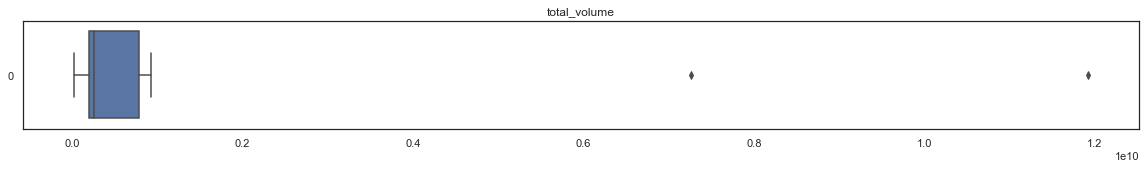

In [70]:
boxplot(df_top10_coins['total_volume'])

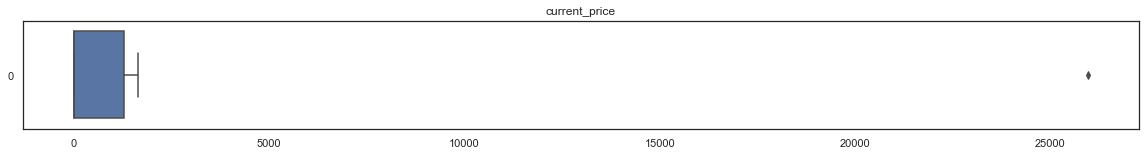

In [71]:
boxplot(df_top10_coins['current_price'])

## Análisis multivariable

In [336]:
df_torta = df_global.copy()
market_cap_others = df_torta.drop(range(10))
sum_cap_others = sum(market_cap_others['market_cap'][10:])
df_torta.drop(range(10,250),inplace=True)
df_torta = df_torta.append({'name': 'Otras', 'market_cap': sum_cap_others}, ignore_index=True)
df_torta

C:\Users\Guille\AppData\Local\Temp\ipykernel_9688\3154547238.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sum_cap_others = sum(market_cap_others['market_cap'][10:])
C:\Users\Guille\AppData\Local\Temp\ipykernel_9688\3154547238.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_torta = df_torta.append({'name': 'Otras', 'market_cap': sum_cap_others}, ignore_index=True)


,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,circulating_supply,max_price,min_price,last_updated
0,bitcoin,btc,Bitcoin,25965.000000,505334532485,1,5.451093e+11,1.192175e+10,1.946770e+07,69045.000000,67.810000,2023-08-25
1,ethereum,eth,Ethereum,1645.390000,197834905602,2,1.978349e+11,7.262542e+09,1.202164e+08,4878.260000,0.432979,2023-08-25
2,tether,usdt,Tether,0.999503,82779760569,3,8.277976e+10,1.122434e+10,8.284913e+10,1.320000,0.572521,2023-08-25
3,binancecoin,bnb,BNB,217.310000,33421449941,4,4.344506e+10,3.896782e+08,1.538562e+08,686.310000,0.039818,2023-08-25
4,ripple,xrp,XRP,0.524097,27780175668,5,5.250042e+10,9.233069e+08,5.291419e+10,3.400000,0.002686,2023-08-25
5,usd-coin,usdc,USD Coin,0.999304,25857383087,6,2.584722e+10,3.627293e+09,2.587651e+10,1.170000,0.877647,2023-08-25
6,staked-ether,steth,Lido Staked Ether,1646.120000,13782413016,7,1.378241e+10,1.715560e+07,8.377825e+06,4829.570000,482.900000,2023-08-25
7,cardano,ada,Cardano,0.259446,9101540359,8,1.168695e+10,2.213937e+08,3.504502e+10,3.090000,0.019253,2023-08-25
8,dogecoin,doge,Dogecoin,0.062615,8812540640,9,8.812528e+09,2.346437e+08,1.407384e+11,0.731578,0.000087,2023-08-25
9,solana,sol,Solana,20.200000,8246327031,10,1.123691e+10,2.825942e+08,4.078934e+08,259.960000,0.500801,2023-08-25


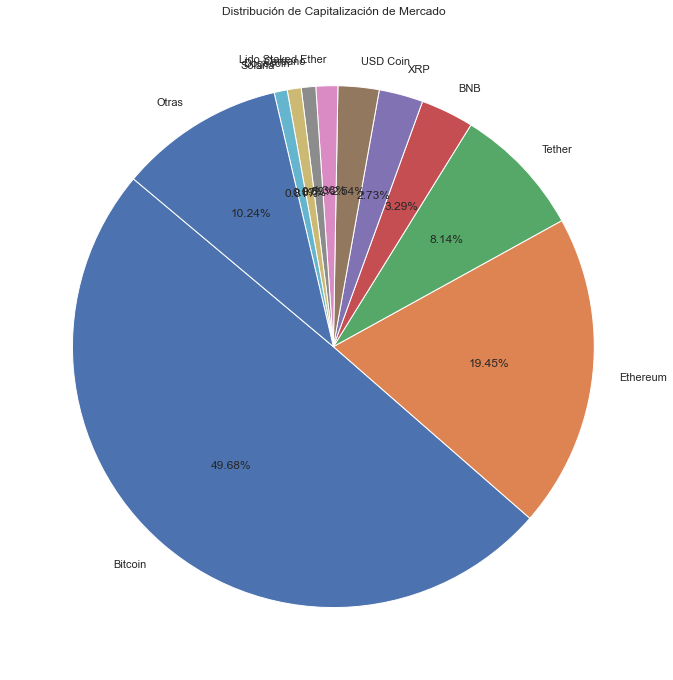

In [286]:
plt.figure(figsize=(12, 12))
plt.title('Distribución de Capitalización de Mercado')
plt.pie(df_torta['market_cap'], labels=df_torta['name'], autopct='%1.2f%%', startangle=140)
plt.show()

C:\Users\Guille\AppData\Local\Temp\ipykernel_9688\2990318844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_global.corr()


<AxesSubplot: >

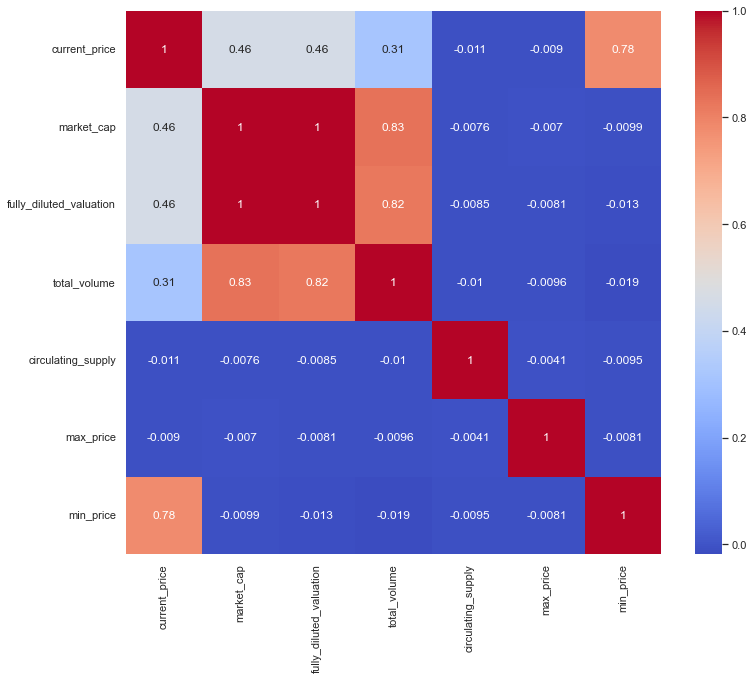

In [337]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_global.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='current_price', ylabel='market_cap'>

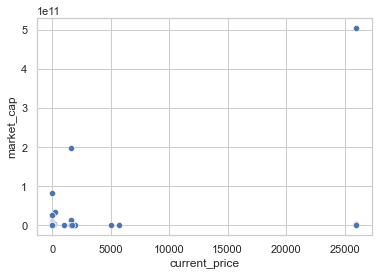

In [267]:
sns.scatterplot(x=df_global['current_price'], y=df_global['market_cap'])

<AxesSubplot: xlabel='total_volume', ylabel='market_cap'>

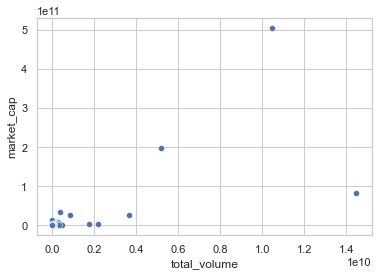

In [268]:
sns.scatterplot(x=df_global['total_volume'], y=df_global['market_cap'])

***

# Análisis de Exchanges

Un "exchange" es una plataforma en línea donde puedes comprar, vender o intercambiar activos financieros como criptomonedas, acciones o divisas. Actúa como intermediario facilitando estas transacciones. 

In [110]:
# Lectura del archivo csv para su exploracion
df_exchanges = pd.read_csv('./Data/exchanges.csv',delimiter=',')
df_exchanges.head(10)

,id,name,year_established,country,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,10.0,1.0,200455.72,131112.82
1,gdax,Coinbase Exchange,2012.0,United States,10.0,2.0,30308.93,30308.93
2,bybit_spot,Bybit,2018.0,British Virgin Islands,10.0,3.0,28728.84,28728.84
3,huobi,Huobi,2013.0,Seychelles,10.0,4.0,38706.51,19743.02
4,kraken,Kraken,2011.0,United States,10.0,5.0,18114.27,13082.62
5,kucoin,KuCoin,2014.0,Seychelles,10.0,6.0,9591.90,9591.90
6,bitstamp,Bitstamp,2013.0,Luxembourg,9.0,7.0,5065.32,2534.65
7,bitfinex,Bitfinex,2012.0,British Virgin Islands,10.0,8.0,2547.89,2184.97
8,binance_us,Binance US,2019.0,United States,10.0,9.0,286.86,286.86
9,okex,OKX,2017.0,Seychelles,9.0,10.0,22980.95,22980.95


In [111]:
df_exchanges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               250 non-null    object 
 1   name                             250 non-null    object 
 2   year_established                 142 non-null    float64
 3   country                          129 non-null    object 
 4   trust_score                      249 non-null    float64
 5   trust_score_rank                 249 non-null    float64
 6   trade_volume_24h_btc             250 non-null    float64
 7   trade_volume_24h_btc_normalized  250 non-null    float64
dtypes: float64(5), object(3)
memory usage: 15.8+ KB


In [112]:
df_exchanges.sort_values('trade_volume_24h_btc_normalized', ascending=False).head(10)

,id,name,year_established,country,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,10.0,1.0,200455.72,131112.82
1,gdax,Coinbase Exchange,2012.0,United States,10.0,2.0,30308.93,30308.93
2,bybit_spot,Bybit,2018.0,British Virgin Islands,10.0,3.0,28728.84,28728.84
14,digifinex,DigiFinex,2018.0,Seychelles,8.0,15.0,27726.79,27726.79
42,bitmart,BitMart,2017.0,Cayman Islands,7.0,43.0,31155.26,24978.28
15,coinw,CoinW,2017.0,United Arab Emirates,8.0,16.0,23370.12,23370.12
9,okex,OKX,2017.0,Seychelles,9.0,10.0,22980.95,22980.95
43,lbank,LBank,2015.0,British Virgin Islands,7.0,44.0,20554.98,20554.98
44,xt,XT.COM,2018.0,Seychelles,7.0,45.0,19935.78,19935.78
3,huobi,Huobi,2013.0,Seychelles,10.0,4.0,38706.51,19743.02


#### Faltan datos en la columna year_established y country, pero los 10 exchanges con mayor volumnen de bitcoin en 24h normalizado, no tiene valores nulos.

In [113]:
df_exchanges.describe()

,year_established,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
count,142.000000,249.000000,249.000000,250.000000,250.000000
mean,2018.035211,6.024096,125.000000,4147.392240,2776.004440
std,2.854415,1.367620,72.024301,15362.088576,9824.707995
min,2011.000000,3.000000,1.000000,0.250000,0.000000
25%,2017.000000,5.000000,63.000000,5.987500,5.580000
50%,2018.000000,6.000000,125.000000,89.940000,78.765000
75%,2020.000000,7.000000,187.000000,1751.940000,949.545000
max,2023.000000,10.000000,249.000000,200455.720000,131112.820000


#### Los valores numericos no presentan anomalias

# Análisis univariable

### Grafico de caja

<AxesSubplot: xlabel='trade_volume_24h_btc'>

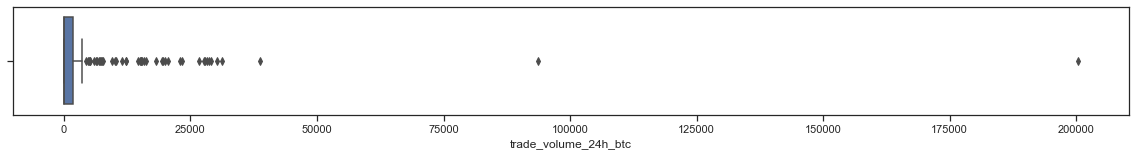

In [114]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trade_volume_24h_btc')

<AxesSubplot: xlabel='trade_volume_24h_btc_normalized'>

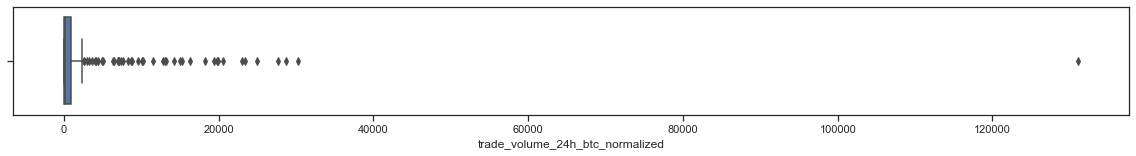

In [115]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trade_volume_24h_btc_normalized')

<AxesSubplot: xlabel='trust_score'>

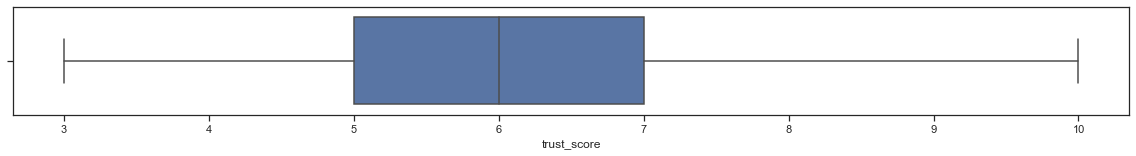

In [116]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trust_score')

<AxesSubplot: xlabel='trust_score_rank'>

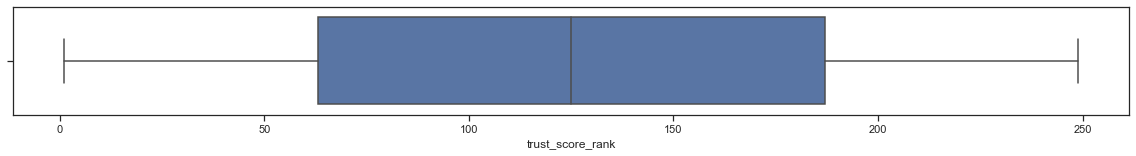

In [117]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trust_score_rank')

<AxesSubplot: xlabel='year_established'>

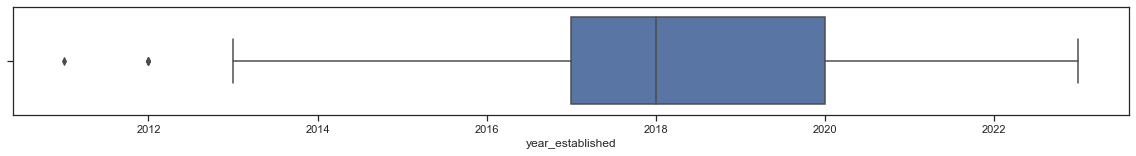

In [118]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='year_established')

### Histogramas

<AxesSubplot: xlabel='trade_volume_24h_btc', ylabel='Count'>

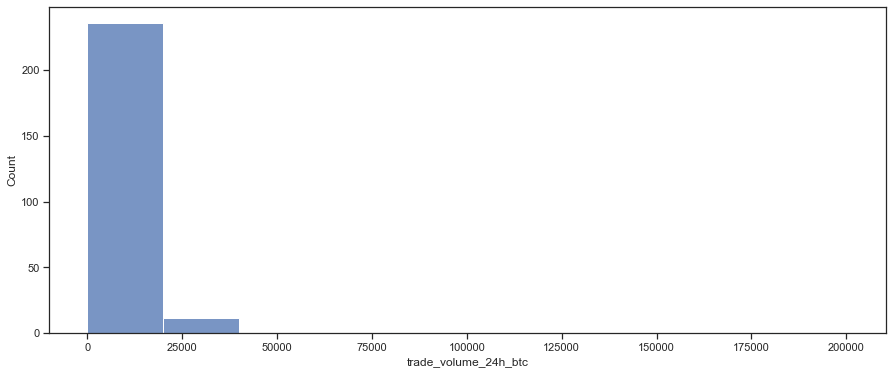

In [119]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_exchanges,x='trade_volume_24h_btc',bins=10)

<AxesSubplot: xlabel='trade_volume_24h_btc_normalized', ylabel='Count'>

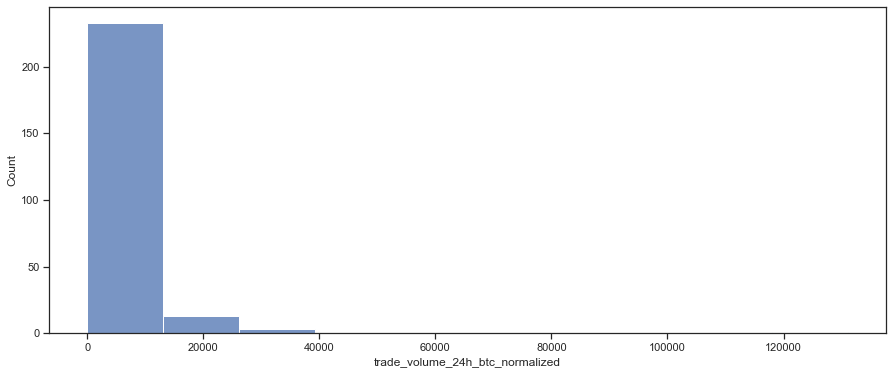

In [120]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_exchanges,x='trade_volume_24h_btc_normalized',bins=10)

<AxesSubplot: xlabel='year_established', ylabel='Count'>

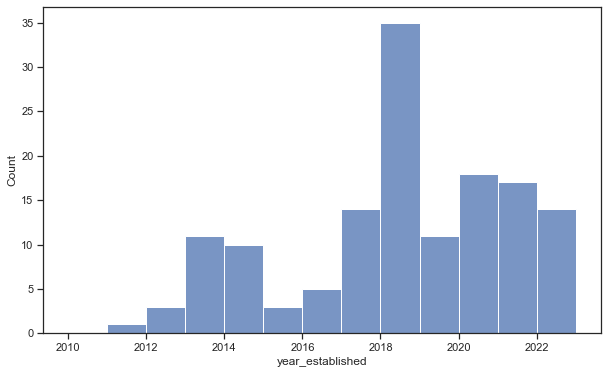

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_exchanges,x='year_established',bins=np.arange(2010,2024,1))

<AxesSubplot: xlabel='trust_score', ylabel='Count'>

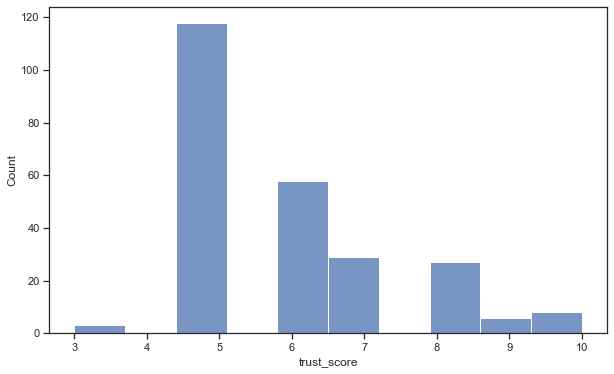

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_exchanges,x='trust_score',bins=10)

<AxesSubplot: xlabel='trust_score_rank', ylabel='Count'>

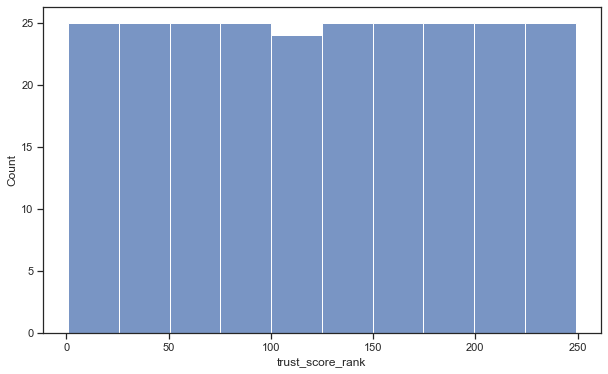

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_exchanges,x='trust_score_rank',bins=10)

### Grafico de barras que muestra la cantidad de veces que un exchange se establecio en un año determinado.

<AxesSubplot: xlabel='year_established', ylabel='count'>

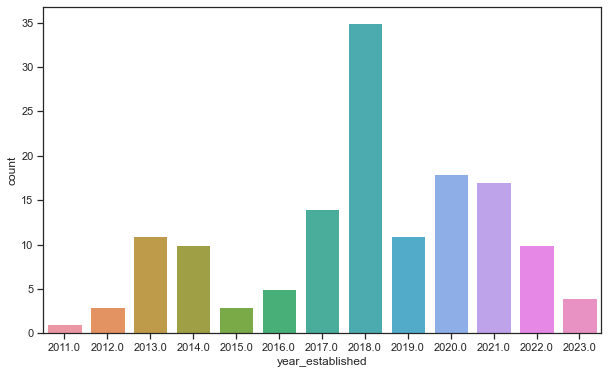

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_exchanges,x='year_established')

#### Se observa que el año en el que se fundaron mas exchanges fue en el 2018

### Grafico de barras para visualizar la cantidad de exchanges se en cuentra en un pais.

<AxesSubplot: xlabel='country', ylabel='count'>

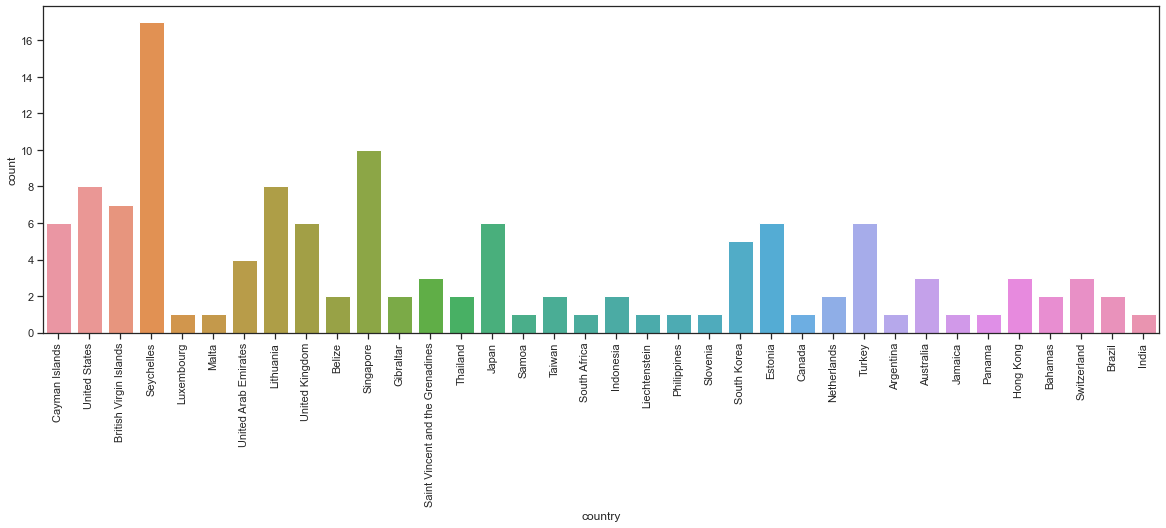

In [125]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_exchanges,x='country')

#### El pais que alberga mas echanges es Seychelles que es un archipiélago, frente a africa oriental.

## Análisis multivariable

In [126]:
df_exchanges.head()

,id,name,year_established,country,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,10.0,1.0,200455.72,131112.82
1,gdax,Coinbase Exchange,2012.0,United States,10.0,2.0,30308.93,30308.93
2,bybit_spot,Bybit,2018.0,British Virgin Islands,10.0,3.0,28728.84,28728.84
3,huobi,Huobi,2013.0,Seychelles,10.0,4.0,38706.51,19743.02
4,kraken,Kraken,2011.0,United States,10.0,5.0,18114.27,13082.62


Esta lista muestra los 10 paises con mayor volumen de movimiento en 24hs de bitcoin normalizado y no normalizado como dato extra.

In [127]:
df_exchanges[['country','trade_volume_24h_btc','trade_volume_24h_btc_normalized']].groupby('country').sum().sort_values('trade_volume_24h_btc_normalized',ascending=False).head(10)

,trade_volume_24h_btc,trade_volume_24h_btc_normalized
country,,
Cayman Islands,280619.72,194880.16
Seychelles,294207.66,165746.74
British Virgin Islands,97838.12,74743.20
Lithuania,55566.24,48428.59
United States,49412.35,44380.70
United Arab Emirates,27862.63,27862.63
South Korea,35570.76,25611.01
Singapore,48662.31,24143.71
Estonia,10363.75,10363.75


trade_volume_24h_btc: Volumen de Bitcoin que se mueven en 24hs

trade_volume_24h_btc_normalized: Volumen de Bitcoin que se mueven en 24hs de forma normalizada para que este valor no sea afectado por altas volatilidades

Se utiliza como guia para el top de paises con mayor volumen de bitcoin la variable trade_volume_24h_btc_normalized ya que como se menciona anteriormente es un dato que tiene en cuenta los anteriores datos historicos y por lo tanto es una informacion mas efectiva.

C:\Users\Guille\AppData\Local\Temp\ipykernel_14356\240690937.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_exchanges.corr(), annot=True, cmap="coolwarm", center=0)


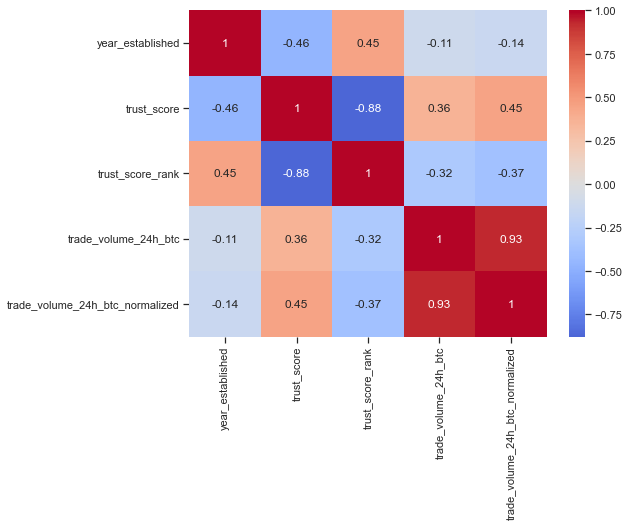

In [128]:
# Crea un grafico de correlaciones 
plt.figure(figsize=(8, 6))
sns.heatmap(df_exchanges.corr(), annot=True, cmap="coolwarm", center=0)
plt.show()

<AxesSubplot: xlabel='trust_score_rank', ylabel='trade_volume_24h_btc_normalized'>

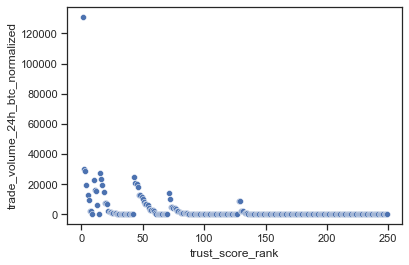

In [129]:
sns.scatterplot(data= df_exchanges, x= "trust_score_rank",y= "trade_volume_24h_btc_normalized")

<AxesSubplot: xlabel='trade_volume_24h_btc', ylabel='trade_volume_24h_btc_normalized'>

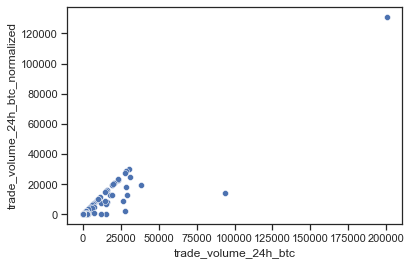

In [130]:
sns.scatterplot(data= df_exchanges, x= "trade_volume_24h_btc",y= "trade_volume_24h_btc_normalized", )